In [3]:
import pandas as pd
import os

# np.load("/content/drive/My Drive/ModelingAllLogs (1)/template2vec_hdfs_logs.npy",allow_pickle=True)
corpus_fake = pd.read_csv("../dataset/Fake.csv")
corpus_fake = corpus_fake[[True if len(x) > 60 else False for x in corpus_fake["text"].values]]
corpus_true = pd.read_csv("../dataset/True.csv")
corpus_true = corpus_true[[True if len(x) > 60 else False for x in corpus_true["text"].values]]

In [4]:
month_to_number = {"December":12,"November":11,"October":10,"September":9,"August":8,"July":7,"June":6,
                   "May":5,"April":3,"March":3,"February":2,"January":1,"Feb":2,"Dec":12,"Nov":11,"Oct":10,
                   "Sep":9,"Aug":8,"Jul":7,"Jun":6,"Apr":4,"Mar":3,"Jan":1}

dates = []
to_delete= []
for i in range(corpus_fake.shape[0]):
   t = corpus_fake.date.iloc[i]
   try:
      if "-" in t:
        p = pd.to_datetime(t.split("-")[0] +":" + str(month_to_number[t.split("-")[1]]) + ":"+ t.split("-")[-1],format="%d:%m:%y")
      else:     
        p =pd.to_datetime(t.split(" ")[1][:-1] +":" + str(month_to_number[t.split(" ")[0]]) + t.split(",")[-1],format='%d:%m %Y')
      dates.append(p)
   except:
     to_delete.append(i)
for i in to_delete:
  corpus_fake.drop(index = i,inplace=True)
corpus_fake["date"] = dates

dates = []
to_delete= []
for i in range(corpus_true.shape[0]):
    t = corpus_true.date.iloc[i]
    try:
        if "-" in t:
            p = pd.to_datetime(t.split("-")[0] +":" + str(month_to_number[t.split("-")[1]]) + ":"+ t.split("-")[-1],format="%d:%m:%y")
        else:     
            p =pd.to_datetime(t.split(" ")[1][:-1] +":" + str(month_to_number[t.split(" ")[0]]) + t.split(",")[-1][:-1],format='%d:%m %Y')
        dates.append(p)
    except:
        print(i)
        to_delete.append(i)
for i in to_delete:
    corpus_true.drop(index = i,inplace=True)
corpus_true["date"] = dates


In [15]:
fake_news_us_el = corpus_fake[(corpus_fake["date"] > pd.to_datetime('01:01:2016', format='%d:%m:%Y')) & 
            (corpus_fake["date"] < pd.to_datetime('31:12:2017', format='%d:%m:%Y')) &
            (corpus_fake["subject"] == "politics")]

true_news_us_el = corpus_true[(corpus_true["date"] > pd.to_datetime('07:02:2016', format='%d:%m:%Y')) & 
            (corpus_true["date"] < pd.to_datetime('01:02:2017', format='%d:%m:%Y')) &
            (corpus_true["subject"] == "politicsNews")]

Data analysis and visualization

In [51]:
print("Total fake news "+str(fake_news_us_el.shape[0]))
print("Total true news "+str(true_news_us_el.shape[0]))

Total fake news 5127
Total true news 5125


In [20]:
import re
from nltk import ngrams
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
lemmetizer = WordNetLemmatizer()
tokenizer = RegexpTokenizer(r"\w+")

text_prepared_fake = []
for t in fake_news_us_el.text.values.tolist():
    v= []
    for w in tokenizer.tokenize(t):
        w_lem = lemmetizer.lemmatize(w.lower())
        if not w_lem.isdigit() and w_lem not in stopwords.words('english') and not bool(re.search(r'\d', w_lem)):
            v.append(w_lem)
    text_prepared_fake.append(v)
    
text_prepared_true = []
for t in true_news_us_el.text.values.tolist():
    v= []
    for w in tokenizer.tokenize(t):
        w_lem = lemmetizer.lemmatize(w.lower())
        if not w_lem.isdigit() and w_lem not in stopwords.words('english') and not bool(re.search(r'\d', w_lem)):
            v.append(w_lem)
    text_prepared_true.append(v)

<h1>Sequence lenght determination</h1>

In [66]:
documents_lenghts_true = []
for t in text_prepared_true:
    documents_lenghts_true.append(len(t))

    
documents_lenghts_fake = []
for t in text_prepared_fake:
    documents_lenghts_fake.append(len(t))   

documents_lenghts = documents_lenghts_true + documents_lenghts_fake
  
# for i in range(0,min(len(documents_lenghts_true),len(documents_lenghts_fake))):  
# #     documents_lenghts.append(documents_lenghts_true[i] + documents_lenghts_fake[i])

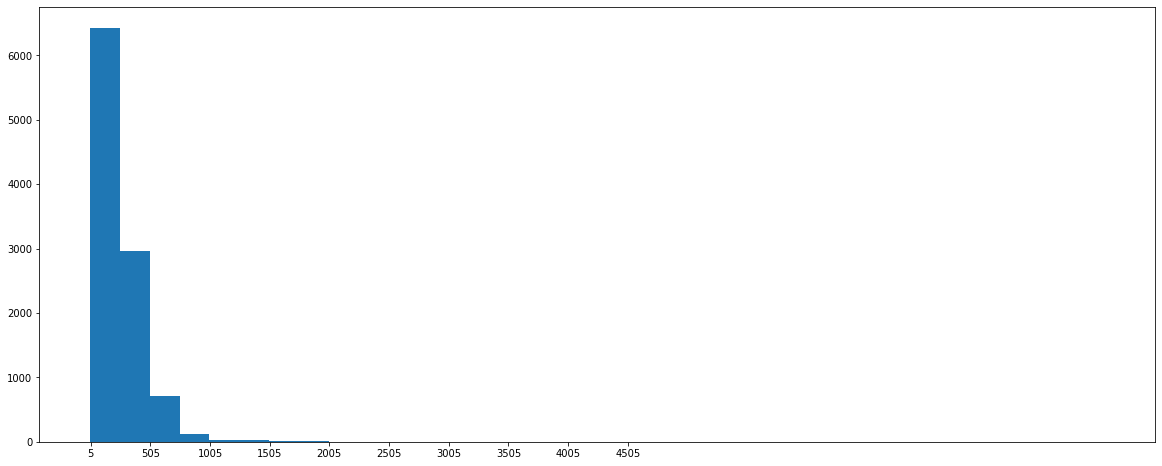

In [67]:
import numpy as np
import matplotlib.pyplot as plt

_ = plt.figure(figsize = (20,8))
plt.hist(documents_lenghts, bins=[0,250,500,750,1000,1500,2000,2500,3000,3500,8500])
plt.xticks(np.arange(min(documents_lenghts), max(documents_lenghts)+1, 500.0))
plt.show()

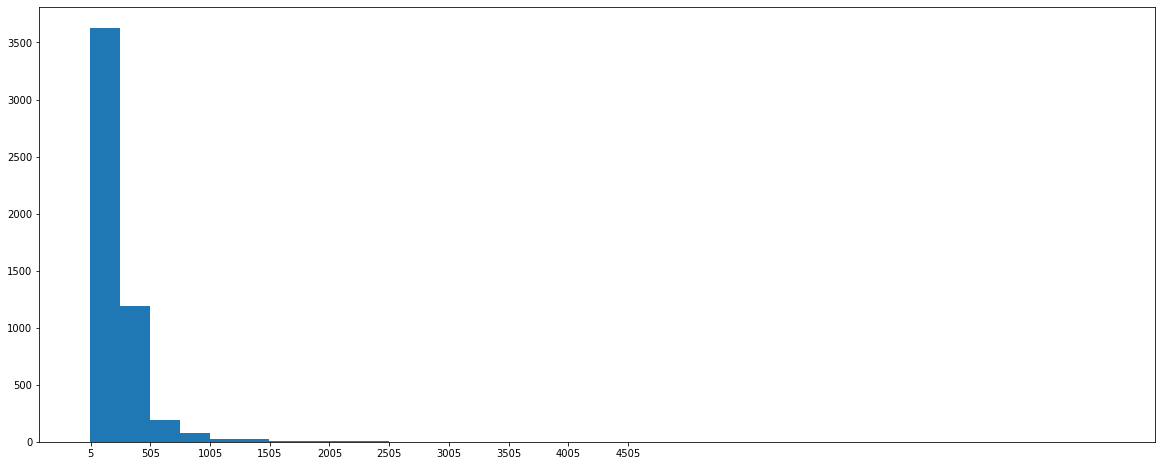

In [68]:
import numpy as np
import matplotlib.pyplot as plt

_ = plt.figure(figsize = (20,8))
plt.hist(documents_lenghts_fake, bins=[0,250,500,750,1000,1500,2000,2500,3000,3500,8500])
plt.xticks(np.arange(min(documents_lenghts_fake), max(documents_lenghts_fake)+1, 500.0))
plt.show()

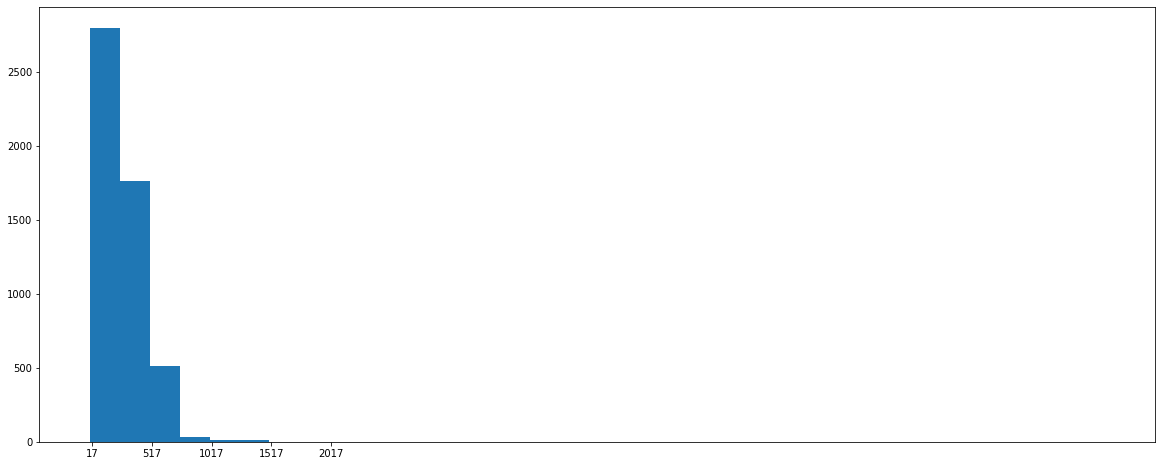

In [69]:
import numpy as np
import matplotlib.pyplot as plt

_ = plt.figure(figsize = (20,8))
plt.hist(documents_lenghts_true, bins=[0,250,500,750,1000,1500,2000,2500,3000,3500,8500])
plt.xticks(np.arange(min(documents_lenghts_true), max(documents_lenghts_true)+500, 500.0))
plt.show()

In [70]:
import statistics as stat
stat.mean(documents_lenghts)

237.45064377682402

In [71]:
stat.median(documents_lenghts)

204.0

In [78]:
std = stat.stdev(documents_lenghts)

In [88]:
boundary = 237 + std
print(f"Percetage of texts that has fewer of {boundary} words -all data --- {len([x for x in documents_lenghts if x <= boundary])*100/len(documents_lenghts)}")
print(f"Percetage of texts that has fewer of {boundary} words - fake corpus --- {len([x for x in documents_lenghts_fake if x <= boundary])*100/len(documents_lenghts_fake)}")
print(f"Percetage of texts that has fewer of {boundary} words - true corpus --- {len([x for x in documents_lenghts_true if x <= boundary])*100/len(documents_lenghts_true)}")

Percetage of texts that has fewer of 434.8107913198721 words -all data --- 86.90011705033164
Percetage of texts that has fewer of 434.8107913198721 words - fake corpus --- 91.0669007216696
Percetage of texts that has fewer of 434.8107913198721 words - true corpus --- 82.73170731707317


In [87]:
boundary = 237 + std
print(f"Percetage of texts that has more than {boundary} words -all data --- {len([x for x in documents_lenghts if x > boundary])*100/len(documents_lenghts)}")
print(f"Percetage of texts that has more than {boundary} words - fake corpus --- {len([x for x in documents_lenghts_fake if x > boundary])*100/len(documents_lenghts_fake)}")
print(f"Percetage of texts that has more than {boundary} words - true corpus --- {len([x for x in documents_lenghts_true if x > boundary])*100/len(documents_lenghts_true)}")

Percetage of texts that has more than 434.8107913198721 words -all data --- 13.099882949668357
Percetage of texts that has more than 434.8107913198721 words - fake corpus --- 8.933099278330408
Percetage of texts that has more than 434.8107913198721 words - true corpus --- 17.26829268292683


In [91]:
official_lenght = int(boundary)
official_lenght

434

<h1>Map word sequences to index sequences</h1>

Every word in the sequence is mapped to It's corresponding index or token ID in the given vocabulary (Word2Vec) 

In [24]:
all_text = text_prepared_fake + text_prepared_true
labels = [1]*len(text_prepared_fake) + [0]*len(text_prepared_true)

In [2]:
labels = load_pickle_file("labels")

In [18]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
# word2vec = KeyedVectors.load_word2vec_format('../new_disk/GoogleNews-vectors-negative300.bin', binary=True)
new_model_w2v = KeyedVectors.load_word2vec_format("../new_disk/updatedWord2Vec.bin", binary=True)

In [143]:
not_in_wv = set()
for sentence in all_text:
    for w in sentence:
        if w not in word2vec.vocab:
            not_in_wv.add(w)


In [144]:
len(not_in_wv)

16445

In [160]:
from nltk.corpus import words
# existing_words = []
# non_existing_words = []
i=0
for w in not_in_wv:
    i+=1
    if i<11333:
        continue
    if w in words.words():
        existing_words.append(w)
    else:
        non_existing_words.append(w)

In [167]:
print(len(existing_words))
len(set(non_existing_words))

439


16006

the non-existing words will be replaced with the word 'unknown_word' and will be represented as vector(unknown) + vector(word)

In [169]:
all_text_repl = [[x if x not in non_existing_words else 'unknown_word' for x in l] for l in all_text]

In [11]:
all_text_repl = load_pickle_file("text_data_prepared.pkl")

In [7]:
unknown_word_vector_repr = word2vec.get_vector('unknown') + word2vec.get_vector('word')
v1 = word2vec.get_vector('unknown')
v2 = word2vec.get_vector('word')

In [6]:
new_model_w2v = Word2Vec(size=300, min_count=1, iter=10)
new_model_w2v.build_vocab(all_text_repl)
total_examples = new_model_w2v.corpus_count
new_model_w2v.build_vocab([list(word2vec.vocab.keys())], update=True)
new_model_w2v.intersect_word2vec_format("../new_disk/GoogleNews-vectors-negative300.bin", binary=True, lockf=1.0)
new_model_w2v.train(all_text_repl, total_examples = total_examples, epochs=12)
new_model_w2v.wv.add('unknown_word',unknown_word_vector_repr, replace=True)

NameError: name 'unknown_word_vector_repr' is not defined

In [18]:
new_model_w2v.wv.save_word2vec_format("../new_disk/updatedWord2Vec.bin",binary=True)

<h2>Create embeding matrix</h2>

In [19]:
import numpy as np
#creating empty word2index dictionary
word2index = {}
#creating empty embeding matrix
vocab = new_model_w2v.vocab

embeding_matrix = np.zeros((len(vocab)+1,300))

#filling the embeding matrix and word2index dictionary
for idx,word in enumerate(list(vocab.keys())):
    word2index[word] = idx
    embeding_matrix[idx] = new_model_w2v.get_vector(word)

In [20]:
padding_value = len(embeding_matrix)-1
#dummy vector for the padding value - 3000440
embeding_matrix[padding_value] = np.zeros(300)

In [26]:
#save embeding matrix and word2index (we do not need anymore word2vec so it does not need to be loaded in memory)
save_pickle_file(word2index,"../new_disk/word2index")
save_pickle_file(embeding_matrix,"../new_disk/embeding_matrix",protocol = 4)
# del word2vec
del new_model_w2v

In [111]:
word2index = load_pickle_file("../new_disk/word2index")
embeding_matrix = load_pickle_file("../new_disk/embeding_matrix",protocol = 4)

<h2>Map sequences of words to sequences of indexes</h2>

In [27]:
index_sequences = []
for sequence in all_text_repl:
    new_sequence = []
    for w in sequence:
        new_sequence.append(word2index[w])
    index_sequences.append(np.array(new_sequence))

In [28]:
save_pickle_file(index_sequences,"index_sequences.pkl")

In [ ]:
padded_inputs = tf.keras.preprocessing.sequence.pad_sequences(
    raw_inputs, padding="post"
)
print(padded_inputs)

<h1>Creating n-grams and tf-idf features</h1>

In [152]:
# unigrams = ngrams(text_prepared, 1)
biigrams = [list(ngrams(t, 2)) for t in text_prepared]
# three_grams = ngrams(text_prepared, 3)
# four_grams = ngrams(text_prepared, 3)

KeyboardInterrupt: 

In [163]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(vocabulary = all_words ,stop_words = 'english',ngram_range = (2,2))


In [165]:
vectors = vectorizer.fit_transform([" ".join(t) for t in text_prepared])

In [ ]:
fature_names = vectorizer.get_feature_names()
vectors_list = vectors.todense().tolist()
df = pd.DataFrame(vectors_list,columns=feature_names)
df.head()

In [95]:
import os
import pickle


def replace_short_phrases(t):
    for key in contractions:
        t = t.replace(key,contractions[key])
    return t

def load_embeddings(file_name, vocabulary):
 
    embeddings = dict()
    with open(file_name, 'r', encoding='utf-8') as doc:
            line = doc.readline()
            while line != '':
                line = line.rstrip('\n').lower()
                parts = line.split(' ')
                vals = np.array(parts[1:], dtype=np.float)
                if parts[0] in vocabulary:
                     embeddings[parts[0]] = vals
                line = doc.readline()
    return embeddings

def load_embedding_weights(vocabulary, embedding_size):
        if os.path.exists('Glove/embedding_matrix.pkl'):
            with open('Glove/embedding_matrix.pkl', 'rb') as f:
                 embedding_matrix = pickle.load(f)
        else:
            print('Creating embedding weights...')
            embeddings = load_embeddings(f'Glove/glove.6B.{embedding_size}d.txt',
             vocabulary)
            embedding_matrix = np.zeros((len(vocabulary), embedding_size))
            for i in range(len(vocabulary)):
                if vocabulary[i] in embeddings.keys():
                    embedding_matrix[i] = embeddings[vocabulary[i]]
                else:
                    embedding_matrix[i] = np.random.standard_normal(embedding_size)
            with open('Glove/embedding_matrix.pkl', 'wb') as f:
                pickle.dump(embedding_matrix, f)
        return embedding_matrix

In [10]:
import pickle
def save_pickle_file(file,file_path,protocol=None):
    with open(file_path,"wb") as f:
        if protocol:
            pickle.dump(file,f,protocol = protocol)
        else:
            pickle.dump(file,f)

def load_pickle_file(file_path, protocol=None):
     with open(file_path,"rb") as f:
        if protocol:
            return pickle.load(f)
        else:
            return pickle.load(f)


In [22]:

contractions = {
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}